In [71]:
import numpy as np
from jwst import datamodels
from jwst.lib import set_telescope_pointing as stp
from jwst.transforms import models as tmodels
%matplotlib inline
from matplotlib import pyplot as plt

In [72]:
model = datamodels.Level1bModel()
model.meta.wcsinfo.v2_ref = -453.363363
model.meta.wcsinfo.v3_ref = -374.068629
model.meta.wcsinfo.v3yangle = 4.449705
model.meta.wcsinfo.vparity = -1
model.meta.wcsinfo.roll_ref = 50.2083272665
model.meta.wcsinfo.ra_ref = 348.8776709
model.meta.wcsinfo.dec_ref = -38.854159

In [73]:
xvert = np.array((-76.602, 37.3507, 37.3406, -76.579))
yvert=np.array((-56.8838, -56.343, 56.3378, 56.8379))


In [74]:
ideal_to_v23 = tmodels.IdealToV2V3(model.meta.wcsinfo.v3yangle,
                                   model.meta.wcsinfo.v2_ref, model.meta.wcsinfo.v3_ref,
                                  model.meta.wcsinfo.vparity)
v2, v3 = ideal_to_v23(xvert, yvert)
print('v2_ref, v3_ref in arcsec')
print(model.meta.wcsinfo.v2_ref, model.meta.wcsinfo.v3_ref)
print('v2, v3 in arcsec')
print(v2)
print(v3)

v2_ref, v3_ref in arcsec
-453.363363 -374.068629
v2, v3 in arcsec
[-381.40552542 -494.97279431 -486.22050226 -372.60547647]
[-436.72405748 -427.34398602 -315.0036096  -323.34335048]


In [75]:
v2_ref = model.meta.wcsinfo.v2_ref / 3600
v3_ref = model.meta.wcsinfo.v3_ref / 3600
roll_ref = model.meta.wcsinfo.roll_ref
ra_ref = model.meta.wcsinfo.ra_ref
dec_ref = model.meta.wcsinfo.dec_ref

angles = [-v2_ref, v3_ref, -roll_ref, -dec_ref, ra_ref]
axes = "zyxyz"
v23_to_sky = tmodels.V23ToSky(angles, axes_order=axes)
ra, dec = v23_to_sky(v2/3600, v3/360)
ind = ra < 0
ra[ind] = ra[ind] + 360
print('ra_ref, dec_ref')
print(ra_ref, dec_ref)
print('ra, dec, in deg')
print(ra)
print(dec)

ra_ref, dec_ref
348.8776709 -38.854159
ra, dec, in deg
[ 246.04585227  231.94144486   26.03046927    9.38090199]
[-34.77540467  -7.31935946  72.95721864  -5.08941889]


In [76]:
print(np.diff(ra*3600))

[ -50775.86670263 -741279.51212926  -59938.4421814 ]


In [77]:
print(np.diff(v2))

[-113.56726888    8.75229204  113.61502579]


In [78]:
print(np.diff(v3))

[   9.38007145  112.34037642   -8.33974088]


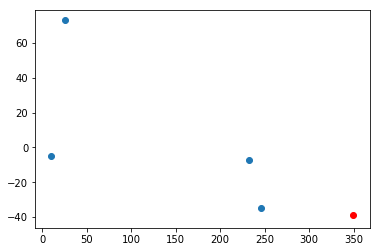

In [79]:
plt.scatter(ra, dec)
plt.scatter(model.meta.wcsinfo.ra_ref, model.meta.wcsinfo.dec_ref, color='r')

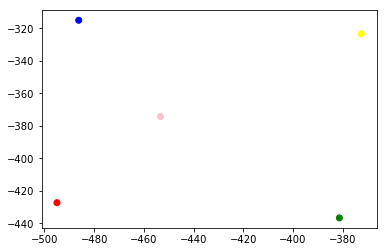

In [80]:
color=['green', 'red', 'blue', 'yellow']
plt.scatter(v2, v3, color=color)
plt.scatter([model.meta.wcsinfo.v2_ref], [model.meta.wcsinfo.v3_ref], color='pink')